# 02 - Capacity, Under and Overfitting
Prepared by Jan Christian Blaise Cruz

DLSU Machine Learning Group

In [ ]:
# Usual imports
import numpy as np
import matplotlib.pyplot as plt

# Imports for lazy people
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, make_scorer

np.random.seed(42)

We'll load the boston dataset, split it, then train it on a Linear Regression model.

In [ ]:
# Load dataset and split
d = load_boston()
X_train, X_test, y_train, y_test = train_test_split(d.data, d.target, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)
error = mean_squared_error(y_pred, y_test)
print(error)

22.098694827098424


As discussed, using cross validation is a good way to see if the model generalizes properly or if it got lucky with the split. If the standard deviation of our cross validation scores is big, this means that randomness has a lot of contribution to the performance (splits matter).

The mean of the cross val scores is a more trustworthy metric than just one split's score.

In [ ]:
# Ten-fold cross validation
mse = make_scorer(mean_squared_error)
scores = cross_val_score(model, d.data, d.target, cv=10, scoring=mse)
print(scores)
print(np.mean(scores))

[  9.28694671  14.15128316  14.07360615  35.20692433  31.88511666
  19.83587796   9.94726918 168.37537954  33.32974507  10.96041068]
34.705255944524914


Next, we'll see what happens to a model graphically given a setting of its capacity.

Let's define a generation function to make random data for us.

In [ ]:
# Define a generation function
def func(x):
    return np.cos(1.5 * np.pi * x)

Then a fit function that trains a linear regression model to a certain degree.

In [ ]:
# Function that trains a model (without bias for simplicity)
def fit(X, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    model.fit(X[:, np.newaxis], y)
    return model

We'll also make a score and plot function to see the performance of the model as well as plot the learned weights and intercepts.

In [ ]:
# Score and plot the final theta parameters
def score_and_plot(model, X, y, degree, s=15):
    scores = cross_val_score(model, X[:, np.newaxis], y, cv=10, scoring=mse)
    X_test = np.linspace(0, 1, 100)

    plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label="Approximate Function")
    plt.plot(X_test, func(X_test), label="Original Function")
    plt.scatter(X, y, edgecolor='g', s=s, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.5f}".format(degree, scores.mean() * 100))
    plt.show()

Generate some data.

In [ ]:
# Generate m sample data
m = 50
np.random.seed(42)

X = np.sort(np.random.rand(m))
y = func(X) + np.random.randn(m) * 0.1

Then train the model.

Experiment setting the degree from 1 to 10 to visualize the difference between an underfitted model with little capacity, and an overfitted model with too much capacity.

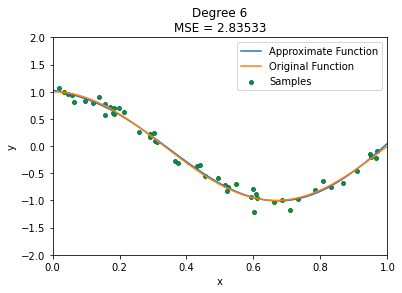

In [ ]:
# Train model
degree = 6
model = fit(X, y, degree)
score_and_plot(model, X, y, degree)